In [24]:
import os
import json
from pprint import pprint
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import log, sqrt

DATA_DIR = os.path.join('data','boxofficemojo')

In [17]:
# read boxoffice data
movie_list = []
for target_file_name in os.listdir(DATA_DIR):
    target_file_path = os.path.join(DATA_DIR, target_file_name)
    with open(target_file_path, 'r') as target_file:
        movie = json.load(target_file)
        movie_list.append(movie)
        
movies = pd.DataFrame(movie_list)
print str(len(movies)) + " movies read"
print movies.dtypes
movies.head()

3728 movies read
alt_title                object
director                 object
domestic_gross          float64
mojo_slug                object
opening_per_theater     float64
opening_weekend_take    float64
production_budget       float64
release_date_limited     object
release_date_wide        object
title                    object
widest_release          float64
worldwide_gross         float64
year                    float64
dtype: object


,alt_title,director,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title,widest_release,worldwide_gross,year
0,"10,000 B.C. (2008)",Roland Emmerich,94784201,10000bc,10518,35867488,105000000,None,2008-03-07,"10,000 B.C.",3454,269784201,2008
1,102 Dalmatians (2000),None,66957026,102dalmatians,7353,19883351,85000000,None,2000-11-22,102 Dalmatians,2704,183611771,2000
2,10 Things I Hate About You (1999),None,38178166,10thingsihateaboutyou,3668,8330681,30000000,None,1999-03-31,10 Things I Hate About You,2311,53478166,1999
3,10 Years (2012),Jamie Linden,203373,10years,7569,22707,NaN,None,2012-09-14,10 Years,63,203373,2012
4,11 Flowers (2013),None,9213,11flowers,1758,3516,NaN,None,2013-02-22,11 Flowers,2,NaN,2013


In [ ]:
# todo:
# convert title 
# dummify top frequent directors
# dumify top frequent title keywrods
# transform:

In [18]:
movies.describe()

,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year
count,3.653000e+03,3548.000000,3.548000e+03,1.591000e+03,3576.000000,2.821000e+03,3721.000000
mean,3.587710e+07,7769.070744,8.919290e+06,4.594223e+07,1359.910794,9.117943e+07,2004.740124
std,5.660351e+07,8251.101404,1.403204e+07,4.056849e+07,1293.817347,1.489563e+08,9.127232
min,7.200000e+01,72.000000,7.200000e+01,2.200000e+02,1.000000,7.200000e+01,1933.000000
25%,6.353250e+05,3212.000000,4.748775e+04,1.675000e+07,52.000000,5.710236e+06,2001.000000
50%,1.323532e+07,5520.500000,3.334686e+06,3.500000e+07,1074.500000,3.554776e+07,2007.000000
75%,4.966253e+07,9463.500000,1.268750e+07,6.500000e+07,2584.250000,1.166729e+08,2011.000000
max,7.605076e+08,204230.000000,1.741446e+08,2.150000e+08,4468.000000,2.787965e+09,2015.000000


In [33]:
movies.count()

alt_title               3728
director                2172
domestic_gross          3653
mojo_slug               3728
opening_per_theater     3548
opening_weekend_take    3548
production_budget       1591
release_date_limited     293
release_date_wide       3718
title                   3728
widest_release          3576
worldwide_gross         2821
year                    3721
dtype: int64

2425 out of 3728 movies have oversea sales


count    2.425000e+03
mean     5.650152e+07
std      9.897702e+07
min      4.720000e+02
25%      4.693543e+06
50%      2.106382e+07
75%      6.871652e+07
max      2.027457e+09
Name: oversea_gross, dtype: float64

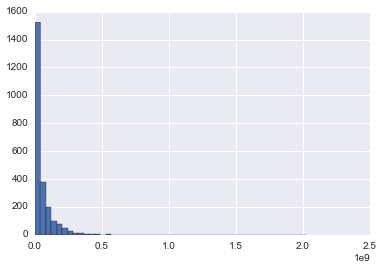

In [61]:
movies['oversea_gross'] = movies['worldwide_gross'] - movies['domestic_gross']
oversea = movies[movies['oversea_gross']>0]
print "{0} out of {1} movies have oversea sales".format(len(oversea), len(movies))
oversea['oversea_gross'].hist(bins=50)
oversea['oversea_gross'].describe()

In [48]:
import statsmodels.api as sm

df = oversea.copy()

y_col = ['oversea_gross']
x_cols = ['domestic_gross','opening_per_theater','opening_weekend_take','production_budget', 'widest_release', 'year']

df_model = df[x_cols + y_col].dropna()

Y = df_model[y_col] 
X = sm.add_constant(df_model[x_cols])
linmodel = sm.OLS(Y,X).fit()
linmodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          oversea_gross   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     666.7
Date:                Thu, 15 Oct 2015   Prob (F-statistic):               0.00
Time:                        15:49:28   Log-Likelihood:                -27335.
No. Observations:                1422   AIC:                         5.468e+04
Df Residuals:                    1415   BIC:                         5.472e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                -4.053e+09   5.58e+08     -7.257      0.000     -5.15e+09 -2.96e+09
domestic_gross           1.2815      0.039     32.538      0.000         1.204     1.359
opening_per_theater   -177.5635    291.958     -0.608      0.543      -750.280   395.153
opening_weekend_take    -0.5539      0.192     -2.881      0.004        -0.931    -0.177
production_budget        0.8293      0.046     18.195      0.000         0.740     0.919
widest_release       -1.673e+04   2430.337     -6.882      0.000     -2.15e+04  -1.2e+04
year                  2.021e+06   2.79e+05      7.250      0.000      1.47e+06  2.57e+06
==============================================================================
Omnibus:                      709.848   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15448.567
Skew:                           1.824   Prob(JB):                         0.00
Kurtosis:                      18.730   Cond. No.                     4.42e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
def transform(df, transform, var_list):
    """
    apply certain transform on a list of variables in dataframe df
    """
    for v in var_list:
        new_v = transform + "_" + v
        if transform == 'log':
            df[new_v] = df[v].apply(lambda x: log(x))
        elif transform == 'sqrt':
            df[new_v] = df[v].apply(lambda x: sqrt(x))
        if transform == 'square':
            df[new_v] = df[v].apply(lambda x: x**2)
    
    return df


In [63]:
df = oversea.copy()
vars_to_transform = ['domestic_gross','opening_weekend_take','production_budget']
df = transform(df,'log', vars_to_transform + y_col)
df = transform(df,'sqrt', vars_to_transform)
df = transform(df,'square', map(lambda x: 'log_'+x, vars_to_transform))
df.head()

,alt_title,director,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title,...,log_opening_weekend_take,log_production_budget,sqrt_oversea_gross,sqrt_domestic_gross,sqrt_opening_weekend_take,sqrt_production_budget,square_log_oversea_gross,square_log_domestic_gross,square_log_opening_weekend_take,square_log_production_budget
0,"10,000 B.C. (2008)",Roland Emmerich,94784201,10000bc,10518,35867488,105000000,None,2008-03-07,"10,000 B.C.",...,17.395342,18.469471,13228.756555,9735.717796,5988.947153,10246.950766,360.251656,337.350851,302.597917,341.121356
1,102 Dalmatians (2000),None,66957026,102dalmatians,7353,19883351,85000000,None,2000-11-22,102 Dalmatians,...,16.805393,18.258162,10800.682617,8182.727296,4459.075128,9219.544457,345.020566,324.704599,282.421244,333.360473
2,10 Things I Hate About You (1999),None,38178166,10thingsihateaboutyou,3668,8330681,30000000,None,1999-03-31,10 Things I Hate About You,...,15.935456,17.216708,3911.521443,6178.848275,2886.291912,5477.225575,273.682872,304.773885,253.938750,296.415032
5,The 11th Hour (2007),None,707343,11thhour,15213,60853,NaN,None,2007-08-17,The 11th Hour,...,11.016216,NaN,527.128068,841.036860,246.684008,NaN,157.123394,181.421261,121.357024,NaN
6,127 Hours (2010),Danny Boyle,18335230,127hours,2333,2136801,18000000,2010-11-05,2011-01-28,127 Hours,...,14.574820,16.705882,6511.802132,4281.965670,1461.780079,4242.640687,308.449943,279.703378,212.425390,279.086504
